In [2]:
import pandas as pd
import seaborn as sns
%pylab inline
import requests, re
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [3]:
# pip install pymongo

In [4]:
import pymongo
import pandas as pd
from pymongo import MongoClient

In [6]:
client = MongoClient()
# client = MongoClient() creates a new MongoClient object. If no arguments are provided, 
# it connects to a default MongoDB server running on 'localhost' on port '27017'.

#point the client at mongo URI
client = MongoClient('mongodb://localhost:27017')
#select database
db = client['Yelp_Database']
# selects the Yelp_Database database from the MongoDB server and assigns it to the db variable.
print(db)

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'Yelp_Database')


In [7]:
#select the collection within the database
business_joined = db['business_cleaned_restaurants']
print(business_joined)

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'Yelp_Database'), 'business_cleaned_restaurants')


In [8]:
cursor = business_joined.find()
print(cursor)

In [9]:
import warnings
warnings.filterwarnings("ignore")
def batched(cursor, batch_size):
    batch = []
    for doc in cursor:
        batch.append(doc)
        if batch and not len(batch) % batch_size:
            yield batch
            batch = []

    if batch:   # last documents
        yield batch

df = pd.DataFrame()
for batch in batched(cursor, 10000):
    df = df.append(batch, ignore_index=True)

In [10]:
df.head(10)

,_id,address,business_id,city,is_open,latitude,longitude,name,postal_code,review_count,...,GoodForKids,HasTV,RestaurantsReservations,WheelchairAccessible,RestaurantsPriceRange,Wifi,Noiselevel,Alcohol,DriveThru,Categories
0,640093fb6fc7584f7c3b397f,8025 Mackenzie Rd,k0hlBqXX-Bt0vf1op7Jr1w,Affton,0,38.565165,-90.321087,Tsevi's Pub And Grill,63123,19,...,Yes,Yes,No,No,1,free,average,full_bar,False,Traditional American
1,640093fb6fc7584f7c3b3980,,eEOYSgkmpB90uNA7lDOMRA,Tampa Bay,1,27.955269,-82.456320,Vietnamese Food Truck,33602,10,...,No,No,No,No,None,No,No,No,False,Vietnamese
2,640093fb6fc7584f7c3b3981,8901 US 31 S,il_Ro8jwPlHresjw9EGmBg,Indianapolis,1,39.637133,-86.127217,Denny's,46227,28,...,Yes,Yes,No,No,1,No,No,No,False,Traditional American
3,640093fb6fc7584f7c3b3982,2575 E Bay Dr,0bPLkL0QhhPO5kt1_EXmNQ,Largo,0,27.916116,-82.760461,Zio's Italian Market,33771,100,...,Yes,Yes,No,Yes,1,No,average,No,False,Italian
4,640093fb6fc7584f7c3b3983,1224 South St,ROeacJQwBeh05Rqg7F6TCg,Philadelphia,1,39.943223,-75.162568,BAP,19147,205,...,Yes,Yes,No,No,1,No,quiet,No,False,Korean
5,640093fb6fc7584f7c3b3984,5505 S Virginia St,9OG5YkX1g2GReZM0AskizA,Reno,1,39.476117,-119.789339,Romano's Macaroni Grill,89502,339,...,Yes,Yes,Yes,No,2,free,average,full_bar,False,Italian
6,640093fb6fc7584f7c3b3985,767 S 9th St,QdN72BWoyFypdGJhhI5r7g,Philadelphia,0,39.939825,-75.157447,Bar One,19147,65,...,No,Yes,No,No,2,free,average,full_bar,False,Italian
7,640093fb6fc7584f7c3b3986,901 N Delaware Ave,aPNXGTDkf-4bjhyMBQxqpQ,Philadelphia,1,39.962582,-75.135657,Craft Hall,19123,65,...,Yes,Yes,No,No,2,No,No,No,False,Traditional American
8,640093fb6fc7584f7c3b3987,312 Piasa St,ljxNT9p0y7YMPx0fcNBGig,Alton,1,38.896563,-90.186203,Tony's Restaurant & 3rd Street Cafe,62002,94,...,Yes,Yes,Yes,Yes,2,free,average,full_bar,False,Italian
9,640093fb6fc7584f7c3b3988,"1625 W Valencia Rd, Ste 101-103",wghnIlMb_i5U46HMBGx9ig,Tucson,0,32.132305,-110.999985,China Dragon Restaurant,85746,23,...,Yes,No,Yes,No,2,No,quiet,beer_and_wine,False,Chinese


In [53]:
df.shape

(27330, 24)

In [11]:
df.isna().sum()

_id                        0
address                    0
business_id                0
city                       0
is_open                    0
latitude                   0
longitude                  0
name                       0
postal_code                0
review_count               0
stars                      0
state                      0
DogsAllowed                0
RestaurantsTakeOut         0
HappyHour                  0
OutdoorSeating             0
GoodForKids                0
HasTV                      0
RestaurantsReservations    0
WheelchairAccessible       0
RestaurantsPriceRange      0
Wifi                       0
Noiselevel                 0
Alcohol                    0
DriveThru                  0
Categories                 0
dtype: int64

In [12]:
df = df.drop(["postal_code", "address"], axis = 1)
# The drop() method of a DataFrame is used to remove rows or columns from the DataFrame. 
# In this case, we want to remove the columns "postal_code" and "address", so we set the 
# axis parameter to 1, which indicates that we want to remove columns.

In [13]:
df.head()

,_id,business_id,city,is_open,latitude,longitude,name,review_count,stars,state,...,GoodForKids,HasTV,RestaurantsReservations,WheelchairAccessible,RestaurantsPriceRange,Wifi,Noiselevel,Alcohol,DriveThru,Categories
0,640093fb6fc7584f7c3b397f,k0hlBqXX-Bt0vf1op7Jr1w,Affton,0,38.565165,-90.321087,Tsevi's Pub And Grill,19,3.0,MO,...,Yes,Yes,No,No,1,free,average,full_bar,False,Traditional American
1,640093fb6fc7584f7c3b3980,eEOYSgkmpB90uNA7lDOMRA,Tampa Bay,1,27.955269,-82.456320,Vietnamese Food Truck,10,4.0,FL,...,No,No,No,No,None,No,No,No,False,Vietnamese
2,640093fb6fc7584f7c3b3981,il_Ro8jwPlHresjw9EGmBg,Indianapolis,1,39.637133,-86.127217,Denny's,28,2.5,IN,...,Yes,Yes,No,No,1,No,No,No,False,Traditional American
3,640093fb6fc7584f7c3b3982,0bPLkL0QhhPO5kt1_EXmNQ,Largo,0,27.916116,-82.760461,Zio's Italian Market,100,4.5,FL,...,Yes,Yes,No,Yes,1,No,average,No,False,Italian
4,640093fb6fc7584f7c3b3983,ROeacJQwBeh05Rqg7F6TCg,Philadelphia,1,39.943223,-75.162568,BAP,205,4.5,PA,...,Yes,Yes,No,No,1,No,quiet,No,False,Korean


In [14]:
## remove quotation marks in name and address column
df['name'] = df.name.str.replace('"','')
# df['address'] = df.address.str.replace('"','')

In [15]:
## filter restaurants of US
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

In [16]:
df_usa = df.loc[df['state'].isin(states)]
df_canada = df.loc[df['state'].isin(states) == False]

# The loc[] accessor is used to select rows based on a Boolean mask, which is created by calling the isin() method on the 
# "state" column of df. The isin() method returns a Boolean Series of the same shape as the column, with True values where 
# the corresponding value in the column is contained in the specified list of states, and False values otherwise.

In [24]:
df_usa

,_id,business_id,categories,city,is_open,latitude,longitude,name,review_count,stars,...,GoodForKids,HasTV,RestaurantsReservations,WheelchairAccessible,RestaurantsPriceRange,Wifi,Noiselevel,Alcohol,DriveThru,Cuisines
0,63ff99d90bf7031b634ff540,k0hlBqXX-Bt0vf1op7Jr1w,"Pubs, Restaurants, Italian, Bars, American (Tr...",Affton,0,38.565165,-90.321087,Tsevi's Pub And Grill,19,3.0,...,Yes,Yes,No,No,1,free,average,full_bar,False,Traditional American
1,63ff99d90bf7031b634ff541,eEOYSgkmpB90uNA7lDOMRA,"Vietnamese, Food, Restaurants, Food Trucks",Tampa Bay,1,27.955269,-82.456320,Vietnamese Food Truck,10,4.0,...,No,No,No,No,None,No,No,No,False,Vietnamese
2,63ff99d90bf7031b634ff542,il_Ro8jwPlHresjw9EGmBg,"American (Traditional), Restaurants, Diners, B...",Indianapolis,1,39.637133,-86.127217,Denny's,28,2.5,...,Yes,Yes,No,No,1,No,No,No,False,Traditional American
3,63ff99d90bf7031b634ff543,0bPLkL0QhhPO5kt1_EXmNQ,"Food, Delis, Italian, Bakeries, Restaurants",Largo,0,27.916116,-82.760461,Zio's Italian Market,100,4.5,...,Yes,Yes,No,Yes,1,No,average,No,False,Italian
4,63ff99d90bf7031b634ff544,ROeacJQwBeh05Rqg7F6TCg,"Korean, Restaurants",Philadelphia,1,39.943223,-75.162568,BAP,205,4.5,...,Yes,Yes,No,No,1,No,quiet,No,False,Korean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27324,63ff99da0bf7031b63505ffc,gPr1io7ks0Eo3FDsnDTYfg,"Sandwiches, Restaurants, Italian",Philadelphia,0,40.060414,-75.191084,Tata Cafe,21,4.0,...,Yes,Yes,No,No,1,free,quiet,No,False,Italian
27325,63ff99da0bf7031b63505ffd,wVxXRFf10zTTAs11nr4xeA,"Restaurants, Specialty Food, Food, Sandwiches,...",Philadelphia,1,40.032483,-75.214430,PrimoHoagies,55,3.0,...,Yes,Yes,No,No,2,No,average,No,False,Italian
27326,63ff99da0bf7031b63505ffe,sf_oQ62L8UEnOOLf00nNGA,"Restaurants, Pizza, Fast Food, Chicken Wings, ...",Hermitage,1,36.193201,-86.614748,Pizza Hut,6,3.0,...,No,No,No,No,1,No,No,No,False,Italian
27327,63ff99da0bf7031b63505fff,8n93L-ilMAsvwUatarykSg,"Coffee & Tea, Food, Sandwiches, American (Trad...",Philadelphia,0,39.951018,-75.198240,Kitchen Gia,22,3.0,...,Yes,Yes,No,No,2,free,average,No,False,Traditional American


In [17]:
df_canada

,_id,business_id,city,is_open,latitude,longitude,name,review_count,stars,state,...,GoodForKids,HasTV,RestaurantsReservations,WheelchairAccessible,RestaurantsPriceRange,Wifi,Noiselevel,Alcohol,DriveThru,Categories
40,640093fb6fc7584f7c3b39a7,YR0nwxBOKk6DiLHNItfsBQ,St Albert,1,53.625071,-113.616645,Boston Pizza,14,3.5,AB,...,Yes,Yes,Yes,No,2,free,No,No,False,Italian
41,640093fb6fc7584f7c3b39a8,jcL_qaGJiappzpnn-ifSoA,Edmonton,0,53.551551,-113.495155,Fat Jakks,8,4.0,AB,...,Yes,Yes,Yes,No,2,No,quiet,full_bar,False,Chinese
84,640093fb6fc7584f7c3b39d3,GpFRwCHN0RI8yFbcfXjfUg,Edmonton,1,53.541717,-113.491940,V Sandwiches,9,3.5,AB,...,Yes,Yes,No,No,2,No,No,No,False,Vietnamese
116,640093fb6fc7584f7c3b39f3,O0YHVrUtxbsEhQ4qaWkVaw,Edmonton,0,53.569500,-113.494179,Boston Pizza,6,2.5,AB,...,No,Yes,Yes,No,3,free,No,No,False,Italian
130,640093fb6fc7584f7c3b3a01,JQ75_672GKJQ3tK1togIWw,Sherwood Park,1,53.512604,-113.317912,Golden Capital Restaurant,8,3.5,AB,...,No,No,No,No,2,No,No,No,False,Chinese
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27165,640093fd6fc7584f7c3ba39c,6uT6Py3nhuNuEyMJ_IADZQ,Edmonton,1,53.524318,-113.618907,Cactus Club Cafe,177,4.0,AB,...,No,Yes,Yes,No,3,free,average,full_bar,False,Traditional American
27199,640093fd6fc7584f7c3ba3be,wcHUOAXE60mlGxVcXjEfTQ,Edmonton,1,53.540785,-113.494521,Wok Box,28,3.0,AB,...,Yes,Yes,No,Yes,2,free,average,beer_and_wine,False,Chinese
27202,640093fd6fc7584f7c3ba3c1,vRvZxm5kv5m3kpe2BQvsLA,Edmonton,1,53.561950,-113.551573,Tony Roma's,21,2.5,AB,...,Yes,Yes,Yes,No,2,No,quiet,full_bar,False,Traditional American
27311,640093fd6fc7584f7c3ba42e,KY2_6trlMFlrSk7CKMNVLg,Edmonton,1,53.588346,-113.564910,AAA Chinese Restaurant & Lounge,8,3.0,AB,...,No,Yes,Yes,No,2,No,average,full_bar,False,Chinese


In [18]:
df_canada['state'].unique()

array(['AB'], dtype=object)

In [19]:
df_usa.rename(columns = {'Categories':'Cuisines'}, inplace = True)
df_canada.rename(columns = {'Categories':'Cuisines'}, inplace = True)

In [20]:
df.rename(columns = {'Categories':'Cuisines'}, inplace = True)

In [23]:
# df_usa = df_usa.drop("categories", axis=1)
# df_canada = df_canada.drop("categories", axis=1)

In [24]:
df_usa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26249 entries, 0 to 27328
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   _id                      26249 non-null  object 
 1   business_id              26249 non-null  object 
 2   city                     26249 non-null  object 
 3   is_open                  26249 non-null  int64  
 4   latitude                 26249 non-null  float64
 5   longitude                26249 non-null  float64
 6   name                     26249 non-null  object 
 7   review_count             26249 non-null  int64  
 8   stars                    26249 non-null  float64
 9   state                    26249 non-null  object 
 10  DogsAllowed              26249 non-null  object 
 11  RestaurantsTakeOut       26249 non-null  object 
 12  HappyHour                26249 non-null  object 
 13  OutdoorSeating           26249 non-null  object 
 14  GoodForKids           

In [25]:
plt.style.use('ggplot')

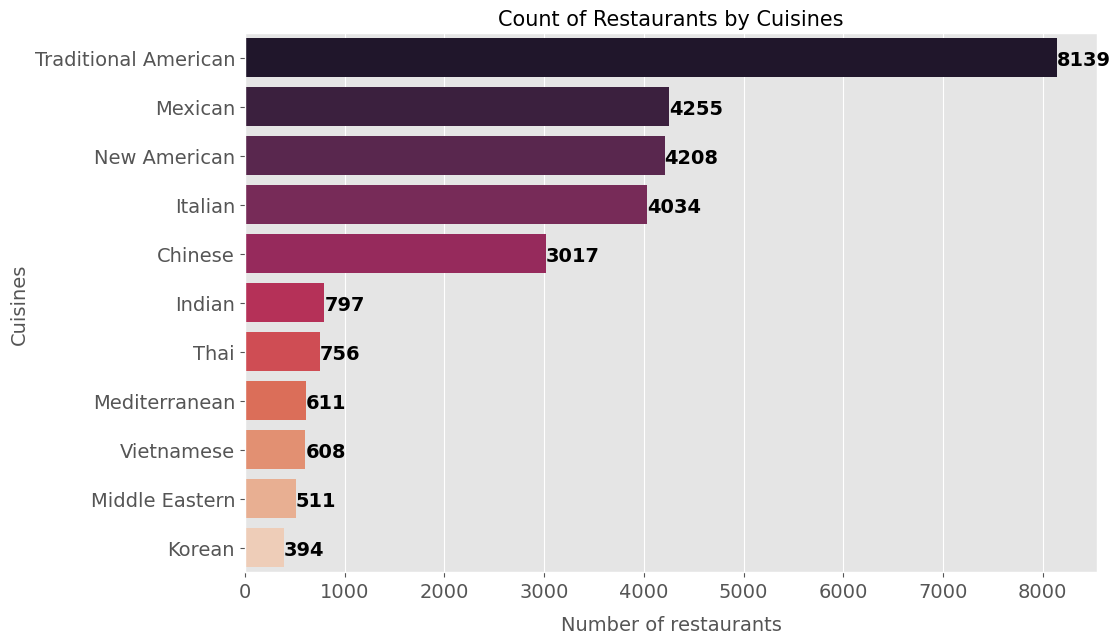

In [58]:
plt.figure(figsize=(11,7))
grouped = df.Cuisines.value_counts()
sns.countplot(y='Cuisines',data=df, 
              order = grouped.index, palette= sns.color_palette("rocket", len(grouped))) # magma is color palette
plt.xlabel('Number of restaurants', fontsize=14, labelpad=10)
plt.ylabel('Cuisines', fontsize=14)
plt.title('Count of Restaurants by Cuisines', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(df.Cuisines.value_counts()):
    plt.text(v, i+0.15, str(v), fontweight='bold', fontsize=14)

### Majority of the restaurants are Traditional American. Following traditional american cusisne, Mexican and New American restaurants are almost same in number.

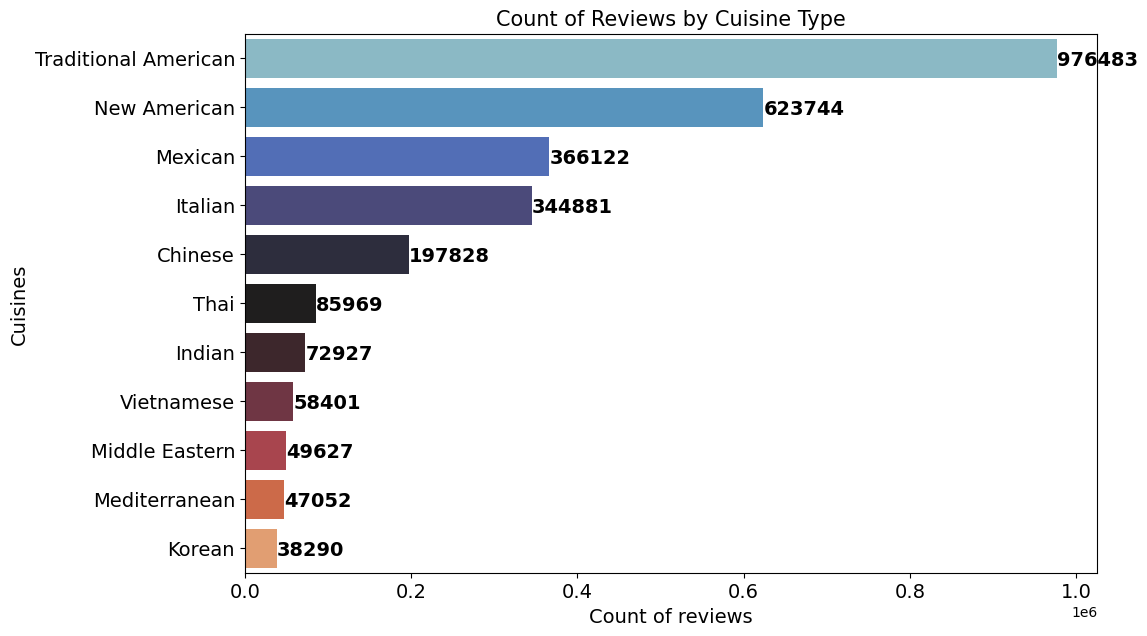

In [22]:
plt.figure(figsize=(11,7))
grouped = df.groupby('Cuisines')['review_count'].sum().sort_values(ascending = False)
sns.barplot(y=grouped.index, x= grouped.values, palette= sns.color_palette("icefire", len(grouped)) )
plt.ylabel('Cuisines', fontsize=14)
plt.xlabel('Count of reviews', fontsize=14)
plt.title('Count of Reviews by Cuisine Type', fontsize=15)
for i,v in enumerate(grouped):
    plt.text(v, i+0.15, str(v),fontweight='bold', fontsize=14)
plt.tick_params(labelsize=14)
plt.show()

**Traditional american restaurants has most number of ratings, followed by New American restaurants. Mexican restaurants have quite low number of review count despite having more restaurants than New American Restaurants. Mexican restaurant owners can be asked to encourage customers to give reviews.**

**Since Korean restaurants are least in number, they fetch least number of reviews.**

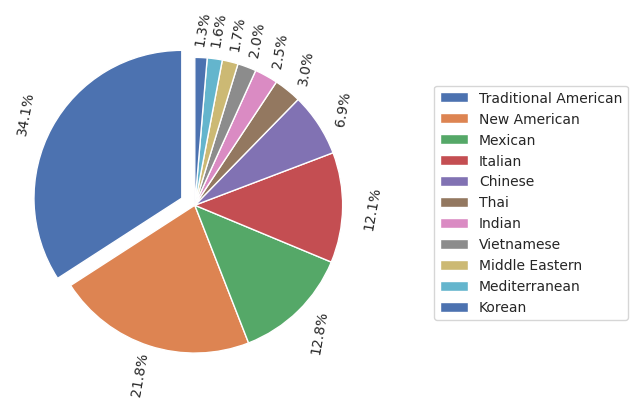

In [310]:
sns.color_palette("magma")
explode = (0.1, 0.0, 0, 0,0,0,0,0,0,0,0) 
patches, labels, pct_texts=plt.pie(grouped.values, explode=explode,rotatelabels=True,
        startangle=90, autopct='%1.1f%%',pctdistance=1.2)
[t.set_rotation(80) for t in pct_texts]
plt.legend(patches,grouped.index,bbox_to_anchor=(1.2,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
matplotlib.rcParams['font.size']=10
plt.show()

**This is pie chart representation of percentage of total reviews recieved by restaurants of every cuisine**

In [55]:
df_temp = pd.DataFrame(df.groupby('Cuisines')['review_count'].sum())
df_temp = df_temp.reset_index()
df_temp

,Cuisines,review_count
0,Chinese,197828
1,Indian,72927
2,Italian,344881
3,Korean,38290
4,Mediterranean,47052
5,Mexican,366122
6,Middle Eastern,49627
7,New American,623744
8,Thai,85969
9,Traditional American,976483


In [56]:
df_temp2 = pd.DataFrame(df.Cuisines.value_counts()).reset_index()
df_temp2.columns=['Cuisines','Count']
df_temp2

,Cuisines,Count
0,Traditional American,8139
1,Mexican,4255
2,New American,4208
3,Italian,4034
4,Chinese,3017
5,Indian,797
6,Thai,756
7,Mediterranean,611
8,Vietnamese,608
9,Middle Eastern,511


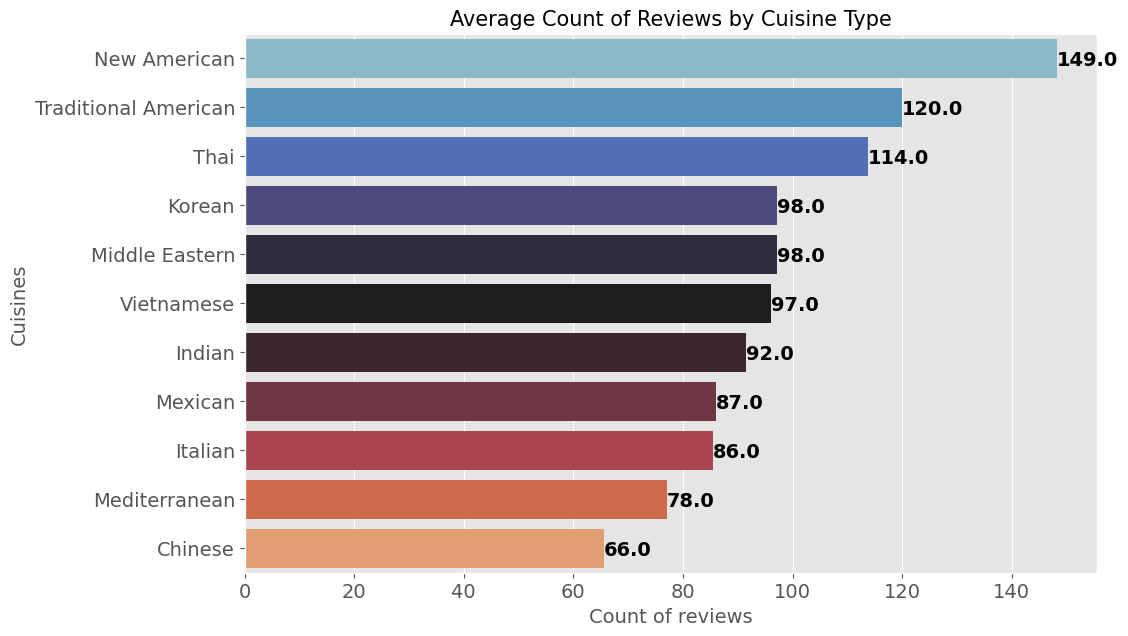

In [57]:
df_temp3 = df_temp.merge(df_temp2,how="inner",on='Cuisines')
df_temp3['Average_reviews'] = df_temp3['review_count']/df_temp3['Count']
plt.figure(figsize=(11,7))
grouped = df_temp3.groupby('Cuisines')['Average_reviews'].sum().sort_values(ascending = False)
sns.barplot(y=grouped.index, x= grouped.values, palette= sns.color_palette("icefire", len(grouped)) )
plt.ylabel('Cuisines', fontsize=14)
plt.xlabel('Count of reviews', fontsize=14)
plt.title('Average Count of Reviews by Cuisine Type', fontsize=15)
for i,v in enumerate(grouped):
    plt.text(v, i+0.15, str(ceil(v)),fontweight='bold', fontsize=14)
plt.tick_params(labelsize=14)

**New American restaurants on an average recieve most number of reviews, while Chinese restaurants recieve least number of reviews on an average.** 

**Korean restaurants despite being lowest in number fetch good number of average reviews. This does improve user engagement on yelp platform, and it indicates its trend is on a rise along with other alternative cuisines like Thai and Middle eastern.**

**Restaurant owners looking to improve their reach and engagement on yelp platform can look into drawing inspirations from trending cuisines.**

#### Top 10 cities with most restaurants

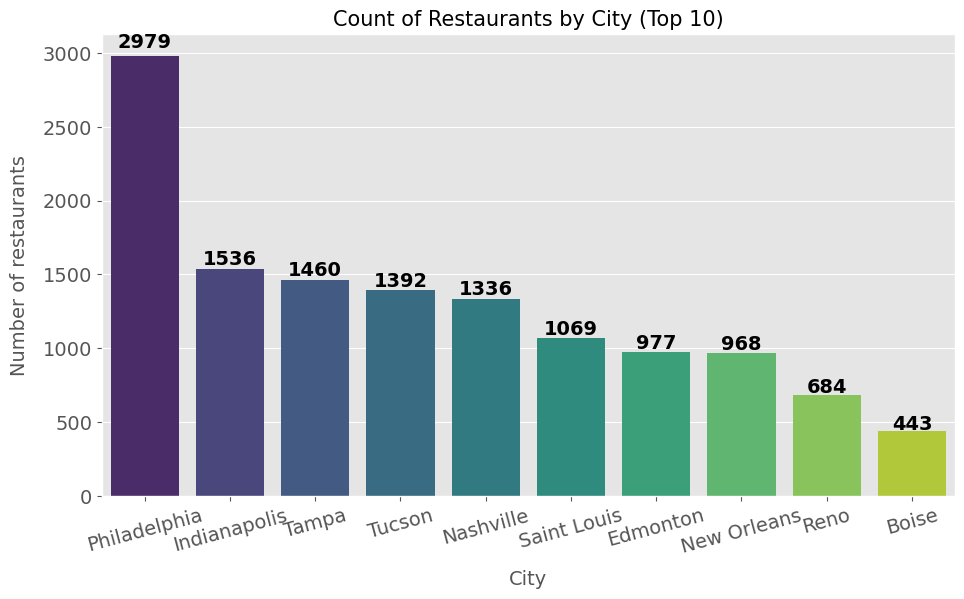

In [59]:
plt.figure(figsize=(11,6))
grouped = df.city.value_counts()[:10]
sns.barplot(grouped.index, grouped.values, palette=sns.color_palette("viridis", len(grouped)))
plt.ylabel('Number of restaurants', fontsize=14, labelpad=10)
plt.xlabel('City', fontsize=14, labelpad=10)
plt.title('Count of Restaurants by City (Top 10)', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)
for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)

**Philadelphia has almost twice the number of restaurants than the next city having most restaurants viz. Indianapolis.**

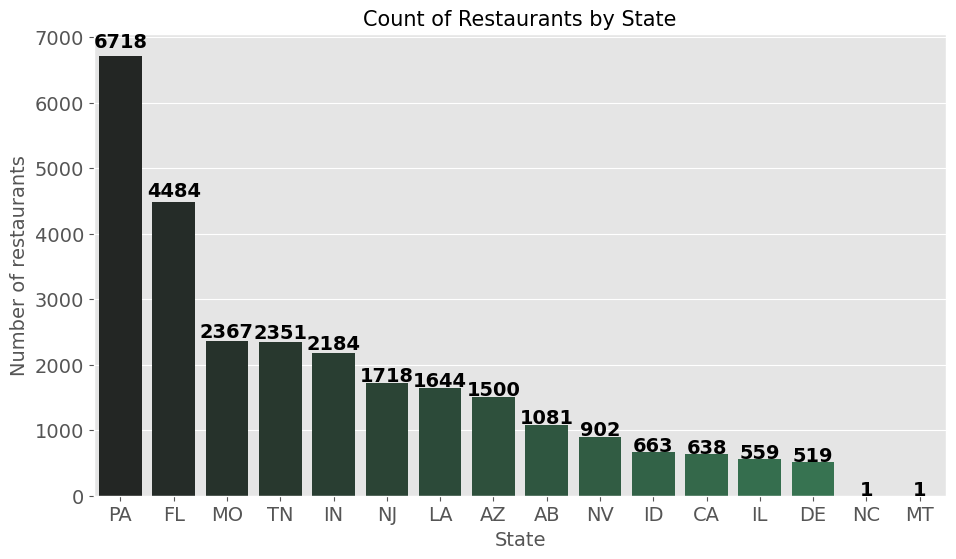

In [116]:
plt.figure(figsize=(11,6))
grouped = df.state.value_counts()
sns.barplot(grouped.index, grouped.values,palette=sns.color_palette("dark:seagreen", len(grouped)) )
plt.ylabel('Number of restaurants', fontsize=14)
plt.xlabel('State', fontsize=14)
plt.title('Count of Restaurants by State', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center', fontweight='bold', fontsize=14)

**Most number of restaurants are located in Pennsylvania state with Philadelphia city having the lions share of restaurants. Followed by Florida state.**

In [61]:
# plt.figure(figsize=(11,7))
# grouped = df.groupby('Cuisines')['review_count'].sum().sort_values(ascending = False)
# sns.barplot(y=grouped.index, x= grouped.values, palette= sns.color_palette("icefire", len(grouped)) )
# plt.ylabel('Cuisines', fontsize=14)
# plt.xlabel('Count of reviews', fontsize=14)
# plt.title('Count of Reviews by Cuisine Type', fontsize=15)
# for i,v in enumerate(grouped):
#     plt.text(v, i+0.15, str(v),fontweight='bold', fontsize=14)
# plt.tick_params(labelsize=14)

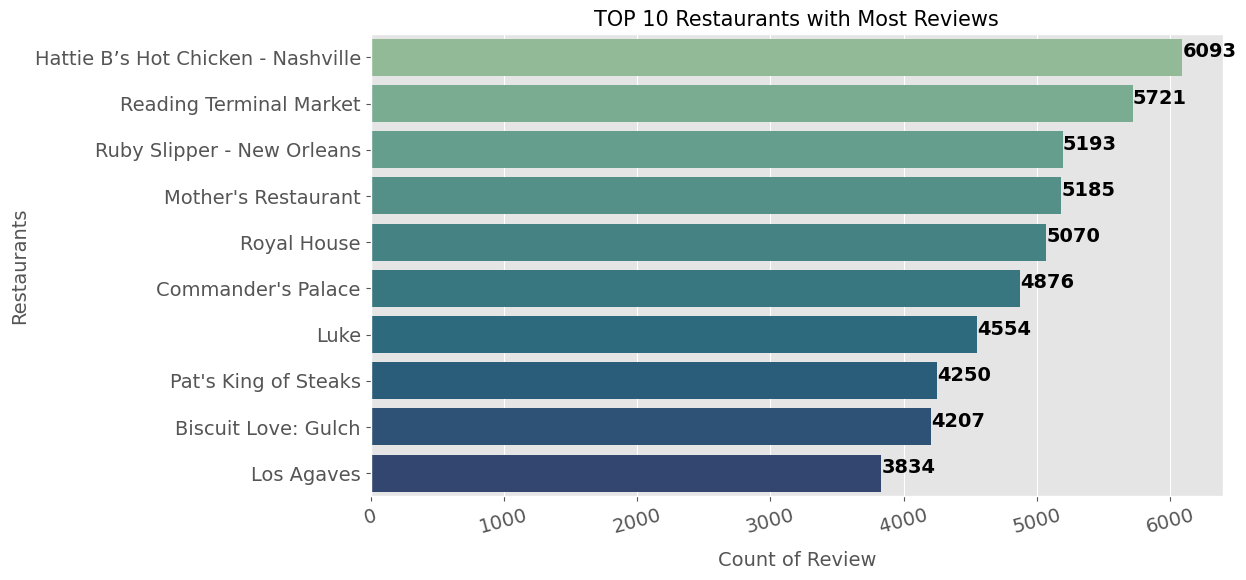

In [68]:
plt.figure(figsize=(11,6))
grouped = df[['name','review_count']].sort_values(by='review_count', ascending=False)[:10]
sns.barplot(x=grouped.review_count, y = grouped.name, palette=sns.color_palette("crest", len(grouped)), ci=None)
plt.xlabel('Count of Review', labelpad=10, fontsize=14)
plt.ylabel('Restaurants', fontsize=14)
plt.title('TOP 10 Restaurants with Most Reviews', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)
for  i, v in enumerate(grouped.review_count):
    plt.text(v, i, str(v), fontweight='bold', fontsize=14)



**Following restaurants have the most number of reviews. This can be because of restaurant staff encouraging customers to give reviews and feedbacks on yelp platform.**

**Hattie B's Hot Chicken - Nashville, established in 2012, garnered most number of reviews due to its popularity**

**Reading Terminal Market is a large food market hosting many restaurants, which explains high number of reviews recieved.**

**Pat's King of Steaks is the originator and inventor of the famous steak and cheesesteak sandwich. Which explains the high number of reviews it recieved.**

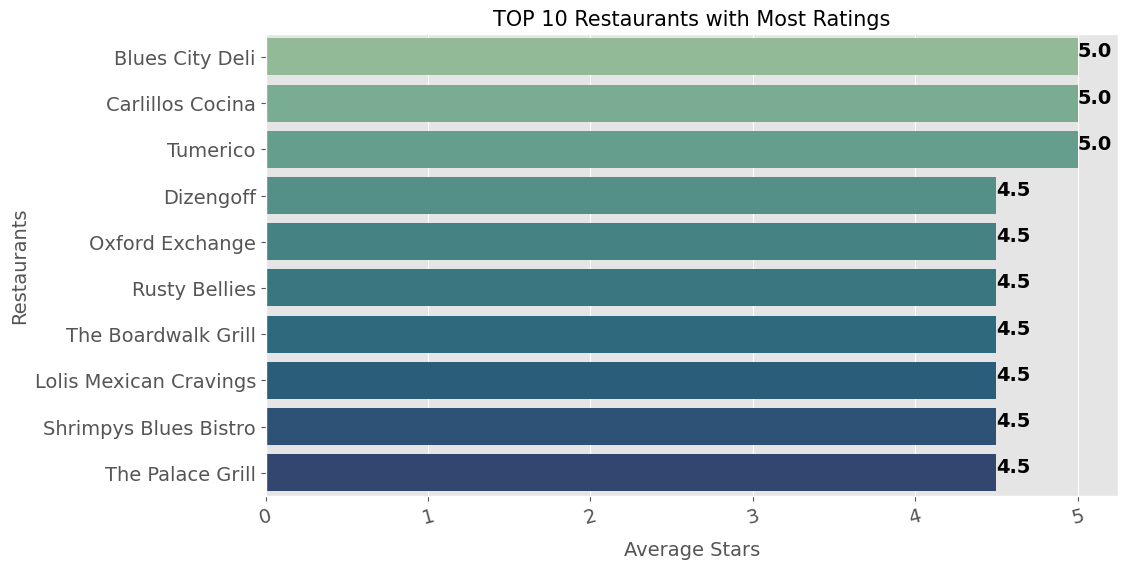

In [92]:
plt.figure(figsize=(11,6))
grouped = df[df['review_count']>700][['name','stars']].sort_values(by='stars', ascending=False)[:10]
sns.barplot(x=grouped.stars, y = grouped.name, palette=sns.color_palette("crest", len(grouped)), ci=None)
plt.xlabel('Average Stars', labelpad=10, fontsize=14)
plt.ylabel('Restaurants', fontsize=14)
plt.title('TOP 10 Restaurants with Most Ratings', fontsize=15)
plt.tick_params(labelsize=14)
plt.xticks(rotation=15)
for  i, v in enumerate(grouped.stars):
    plt.text(v, i, str(v), fontweight='bold', fontsize=14)


**Following are the restaurants having highest average rating, with number of reviews at least 700 to maintain authenticity of higher rating, since restaurant having only two reviews with 5 star rating would make its average rating 5 star. Only 3 restaurants managed to obtain 5 star average rating while many restaurants maintain 4.5 star average rating.**

**Blues City Deli is a well established restaurant in Missouri and one of the best rated restaurants across many other online platforms, including Yelp platform. This high rating is owing to good and consistent service, and food quality it provides.**

**Restaurant owners with lower engagement and ratings can study consistently top rated restaurants for improvement.**

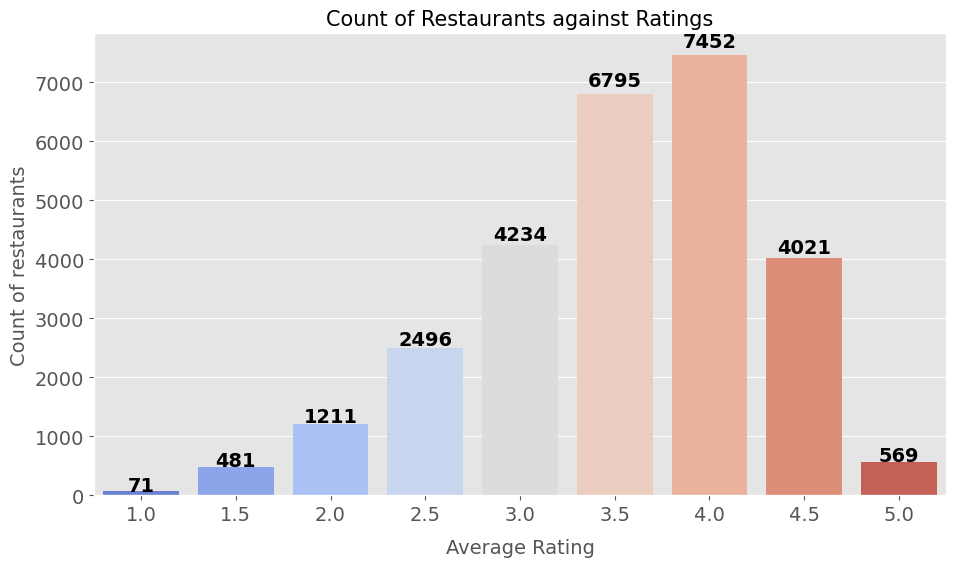

In [96]:
plt.figure(figsize=(11,6))
grouped = df.stars.value_counts().sort_index()
sns.barplot(grouped.index, grouped.values, palette=sns.color_palette("coolwarm", len(grouped)))
plt.xlabel('Average Rating', labelpad=10, fontsize=14)
plt.ylabel('Count of restaurants', fontsize=14)
plt.title('Count of Restaurants against Ratings', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(v), horizontalalignment ='center',fontweight='bold', fontsize=14)

**Restaurants having average 4 star rating are the most in number, While those having 1 star average rating are the least in number. Also restaurants having perfect 5 stars are less in number. This suggest that if customers likes a particular restaurant, they are more likely to give a 4 star rating rather than 5 star rating.**

We are going to plot the no of reviews received by restaurants of average star rating


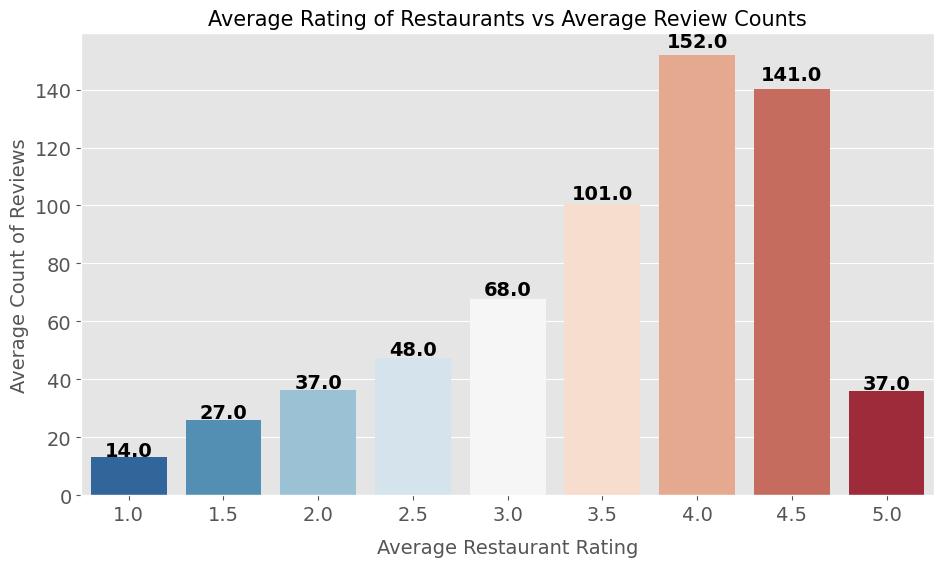

In [151]:
plt.figure(figsize=(11,6))
grouped = df.groupby(df.stars)['review_count'].sum()/df.stars.value_counts().sort_index()
sns.barplot(grouped.index, grouped.values, palette=sns.color_palette("RdBu_r", len(grouped)))
plt.xlabel('Average Restaurant Rating', labelpad=10, fontsize=14)
plt.ylabel('Average Count of Reviews', fontsize=14)
plt.title('Average Rating of Restaurants vs Average Review Counts', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(ceil(v)), horizontalalignment ='center',fontweight='bold', fontsize=14)

**It is observed that restaurants having 4 star average rating get the most number of reviews on an average. Restaurants having 5 star ratings get as low as 37 reviews on an average. Restaurants having 4.5 ratings recieve more ratings on an average compared to those having 3.5 star rating, despite 3.5 star rated restaurants being more in number.**

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27330 entries, 0 to 27329
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   _id                      27330 non-null  object 
 1   business_id              27330 non-null  object 
 2   city                     27330 non-null  object 
 3   is_open                  27330 non-null  int64  
 4   latitude                 27330 non-null  float64
 5   longitude                27330 non-null  float64
 6   name                     27330 non-null  object 
 7   review_count             27330 non-null  int64  
 8   stars                    27330 non-null  float64
 9   state                    27330 non-null  object 
 10  DogsAllowed              27330 non-null  object 
 11  RestaurantsTakeOut       27330 non-null  object 
 12  HappyHour                27330 non-null  object 
 13  OutdoorSeating           27330 non-null  object 
 14  GoodForKids           

(1.0, 5.0)

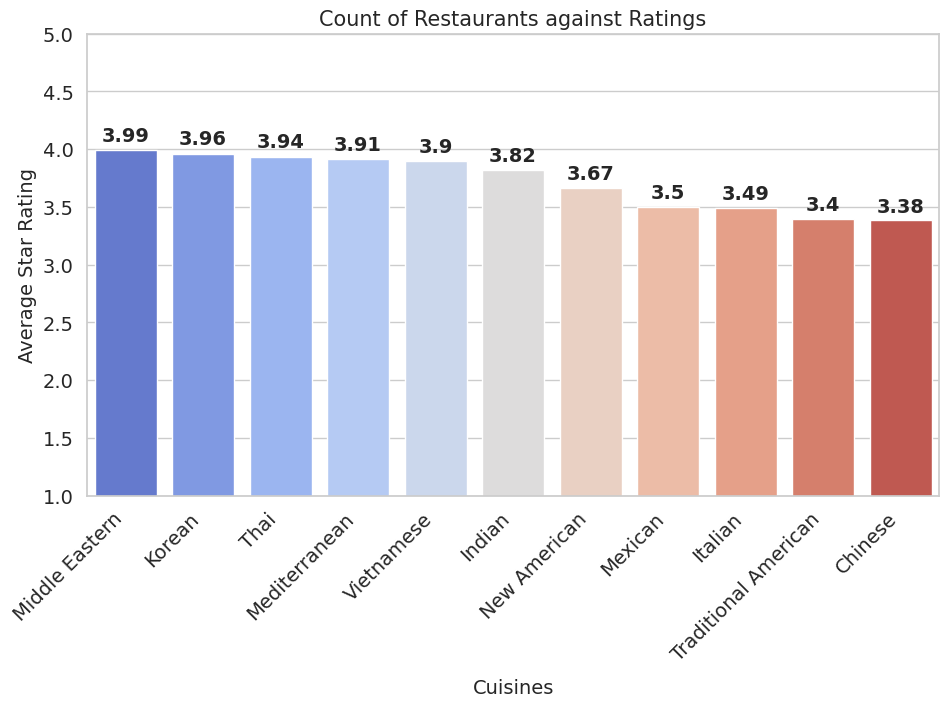

In [209]:
plt.figure(figsize=(11,6))
grouped = df.groupby("Cuisines")['stars'].mean().sort_values(ascending=False)
sns.barplot(grouped.index, grouped.values, palette=sns.color_palette("coolwarm", len(grouped)))
plt.xlabel('Cuisines', labelpad=10, fontsize=14)
plt.ylabel('Average Star Rating', fontsize=14)
plt.title('Count of Restaurants against Ratings', fontsize=15)
plt.tick_params(labelsize=14)
for  i, v in enumerate(grouped):
    plt.text(i, v*1.02, str(round(v,2)) ,horizontalalignment ='center',fontweight='bold', fontsize=14)
    plt.xticks(rotation=45, ha='right')
plt.ylim([1.0,5.0])    

**Trending alternate cuisines like Middle Eastern, Korean and Thai recieve high average ratings. Sharp drop is seen for New American cuisine. This suggests preference for the newer trending cuisines amongst the customers, which might be due to better quality of food and services provided by these restaurants.**

(1.0, 5.0)

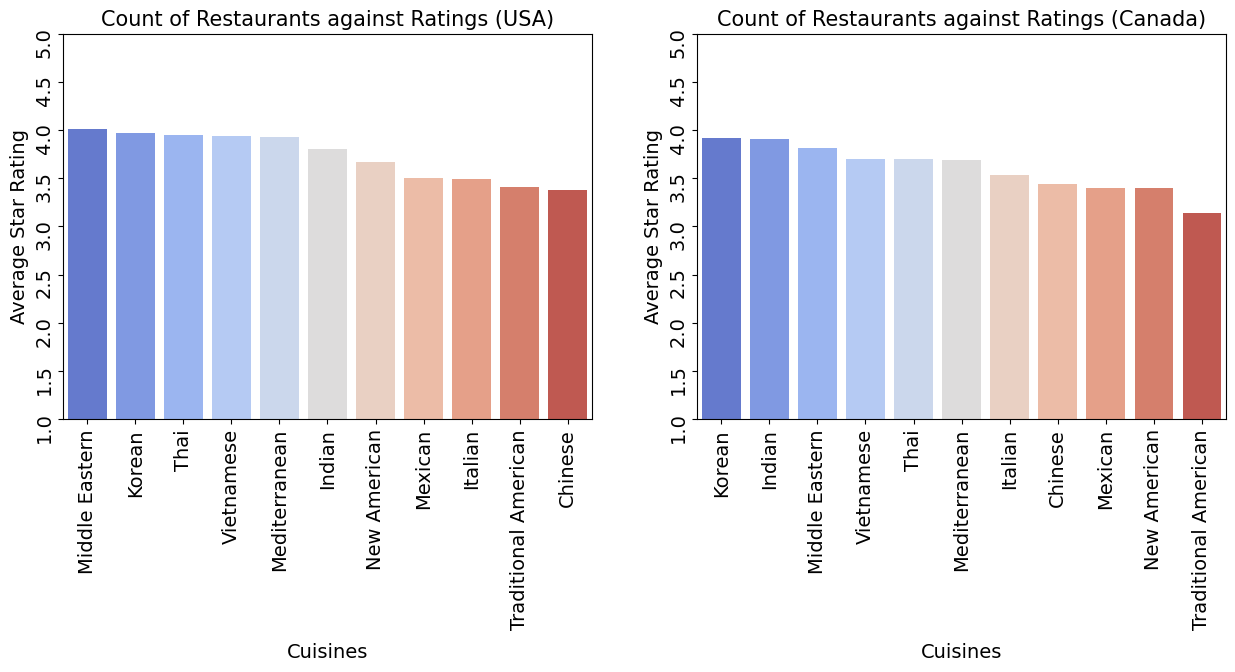

In [35]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))
grouped = df_usa.groupby("Cuisines")['stars'].mean().sort_values(ascending=False)
sns.barplot(grouped.index, grouped.values,ax=ax[0], palette=sns.color_palette("coolwarm", len(grouped)))
ax[0].set_xlabel('Cuisines', labelpad=10, fontsize=14)
ax[0].set_ylabel('Average Star Rating', fontsize=14)
ax[0].set_title('Count of Restaurants against Ratings (USA)', fontsize=15)
ax[0].tick_params(labelsize=14,rotation=90)
ax[0].set_ylim([1.0,5.0])   

#-------------------------------------------------------------------------------#

grouped = df_canada.groupby("Cuisines")['stars'].mean().sort_values(ascending=False)
sns.barplot(grouped.index, grouped.values,ax=ax[1], palette=sns.color_palette("coolwarm", len(grouped)))
ax[1].set_xlabel('Cuisines', labelpad=10, fontsize=14)
ax[1].set_ylabel('Average Star Rating', fontsize=14)
ax[1].set_title('Count of Restaurants against Ratings (Canada)', fontsize=15)
ax[1].tick_params(labelsize=14,rotation=90)
ax[1].set_ylim([1.0,5.0]) 

**Korean and Indian Cuisine restaurants have highest average ratings in Canada, while New and Traditional American fetch lowest average ratings. Indian and Korean cuisines seems to be trending amongst the Canadian customer base.**

Text(0.5, 1.0, 'Average Rating by Wifi Availability')

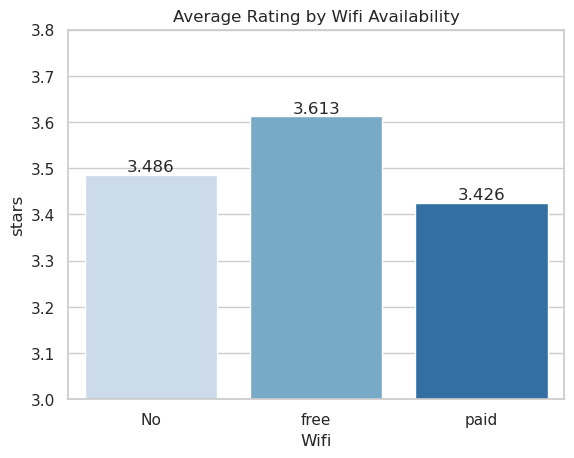

In [257]:
star_with_wifi = df.groupby(['Wifi'])['stars'].mean().reset_index()
sns.set(style="whitegrid")
ax = sns.barplot(x = 'Wifi', y = 'stars', data = star_with_wifi, palette = 'Blues')
for patch in ax.patches:
    x = patch.get_bbox().get_points()[:, 0]
    y = patch.get_bbox().get_points()[1, 1]
    ax.annotate('{:.3f}'.format(y), (x.mean(), y), ha='center', va='bottom')
plt.ylim([3, 3.8]);
plt.title("Average Rating by Wifi Availability")

**Restaurants having free wifi recieve better average rating than for paid or No wifi. Keeping a paid wifi service does not improve obtained average rating. This suggests having no wifi service is slightly better than having paid wifi service.**

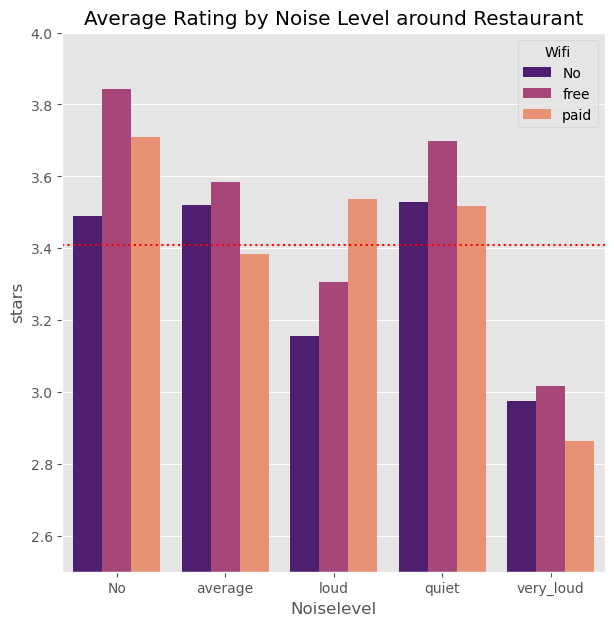

In [35]:
star_with_wifiandnoise = df.groupby(['Noiselevel', 'Wifi']).mean().reset_index()
f, ax = plt.subplots(figsize=(7, 7))
ax = sns.barplot(x = 'Noiselevel', y = 'stars', hue = 'Wifi', data = star_with_wifiandnoise, palette = 'magma')
ax.axhline(
    y=star_with_wifiandnoise['stars'].mean(), 
    color='red',
    linestyle='dotted'
)
plt.ylim([2.5, 4]);
plt.title("Average Rating by Noise Level around Restaurant")
plt.show()

**No noise level + Free wifi and quite noise level + free wifi combination fetches highest average ratings, whereas restaurants having very loud noise levels get lowest ratings. This suggests that restaurants should look to maintain least noise levels in surroundings and offer free wifi to offer best customer experience.**

Text(0.5, 1.0, 'Average Rating by Noise Level around Restaurant in Canada')

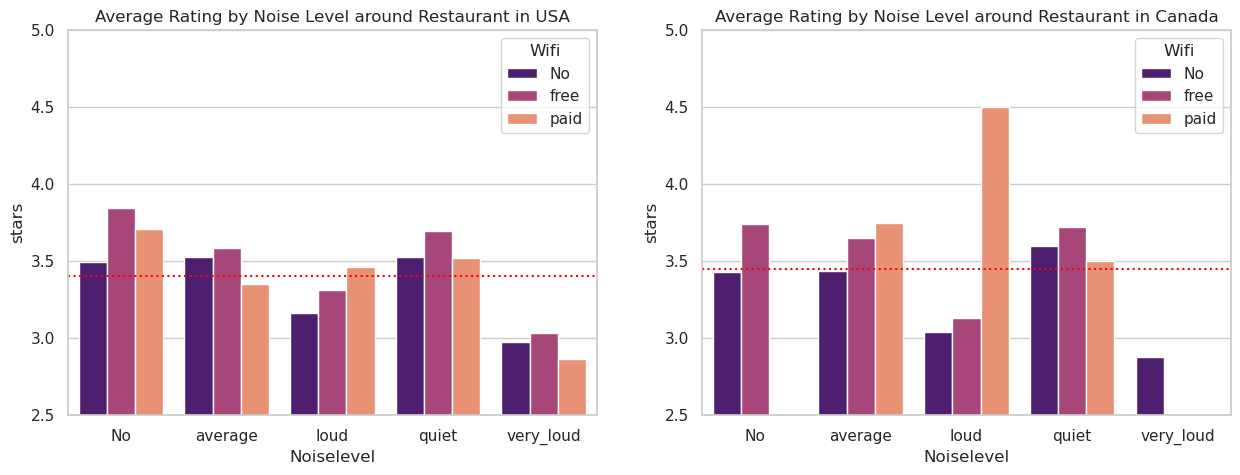

In [212]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))
star_with_wifiandnoise = df_usa.groupby(['Noiselevel', 'Wifi']).mean().reset_index()
ax1 = sns.barplot(ax=ax[0],x = 'Noiselevel', y = 'stars', hue = 'Wifi', data = star_with_wifiandnoise, palette = 'magma')
ax1.axhline(
    y=star_with_wifiandnoise['stars'].mean(), 
    color='red',
    linestyle='dotted'
)
ax[0].set_ylim([2.5, 5]);
ax[0].set_title("Average Rating by Noise Level around Restaurant in USA")
#-------------------------------------------------------------------#
star_with_wifiandnoise = df_canada.groupby(['Noiselevel', 'Wifi']).mean().reset_index()
ax2 = sns.barplot(ax=ax[1],x = 'Noiselevel', y = 'stars', hue = 'Wifi', data = star_with_wifiandnoise, palette = 'magma')
ax2.axhline(
    y=star_with_wifiandnoise['stars'].mean(), 
    color='red',
    linestyle='dotted'
)
ax[1].set_ylim([2.5, 5]);
ax[1].set_title("Average Rating by Noise Level around Restaurant in Canada")

**Unusual high average rating is observed for restaurants having loud noiselevel in surrounding and having paid wifi, this can be explained by lesser number of data points available for canada. In general it is clear that customers prefer low noise levels.**

Text(0.5, 1.0, 'Average Rating by Restaurants price range (4 being highest)')

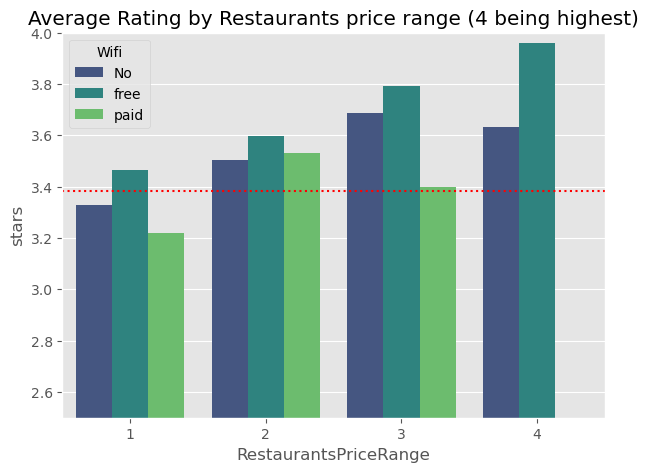

In [45]:
df_temp = df[df['RestaurantsPriceRange']!='None']
star_with_wifiandnoise = df_temp.groupby(['RestaurantsPriceRange','Wifi']).mean().reset_index()
f, ax = plt.subplots(figsize=(7, 5))
ax = sns.barplot(x = 'RestaurantsPriceRange', y = 'stars',hue='Wifi', data = star_with_wifiandnoise, palette = 'viridis')
ax.axhline(
    y=star_with_wifiandnoise['stars'].mean(), 
    color='red',
    linestyle='dotted'
)

plt.ylim([2.5, 4]);
plt.title("Average Rating by Restaurants price range (4 being highest)")

**It is observed that expensive restaurants(price range 4) have no paid wifi service at all and having free wifi service is  fetches better average ratings than having no wifi service.**

**Restaurants in price range 3 have better average rating for no wifi service than that in price range 4. This could indicate that restaurants in price range 3 offer better price to customer satisfaction compared to price range 4 restaurants when no wifi service is provided.**

Text(0.5, 1.0, 'Average Rating by Alcohol served in Restaurants')

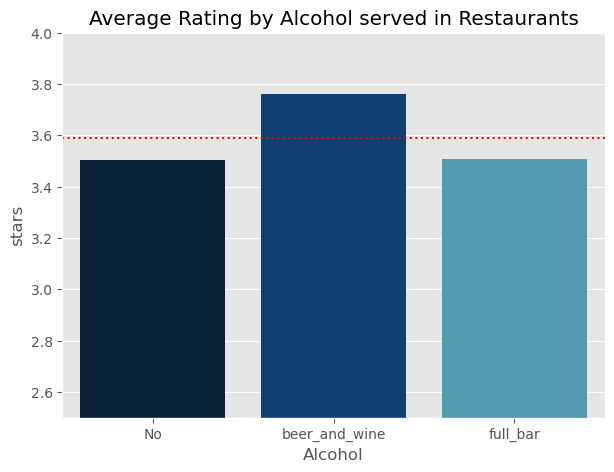

In [44]:
df_temp = df[df['Alcohol']!='None']
star_with_wifiandnoise = df_temp.groupby(['Alcohol']).mean().reset_index()
f, ax = plt.subplots(figsize=(7, 5))
ax = sns.barplot(x = 'Alcohol', y = 'stars', data = star_with_wifiandnoise, palette = 'ocean')
ax.axhline(
    y=star_with_wifiandnoise['stars'].mean(), 
    color='red',
    linestyle='dotted'
)

plt.ylim([2.5, 4]);
plt.title("Average Rating by Alcohol served in Restaurants")

**Beer and wine serving restaurants recieve higher average rating. Which could indicate that restaurants serving beer and wine are more of the fine dining variety.**

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27330 entries, 0 to 27329
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   _id                      27330 non-null  object 
 1   business_id              27330 non-null  object 
 2   categories               27330 non-null  object 
 3   city                     27330 non-null  object 
 4   is_open                  27330 non-null  int64  
 5   latitude                 27330 non-null  float64
 6   longitude                27330 non-null  float64
 7   name                     27330 non-null  object 
 8   review_count             27330 non-null  int64  
 9   stars                    27330 non-null  float64
 10  state                    27330 non-null  object 
 11  DogsAllowed              27330 non-null  object 
 12  RestaurantsTakeOut       27330 non-null  object 
 13  HappyHour                27330 non-null  object 
 14  OutdoorSeating        

Text(0.5, 1.0, 'Average Star rating by Outdoor Seating Availability and Noise level')

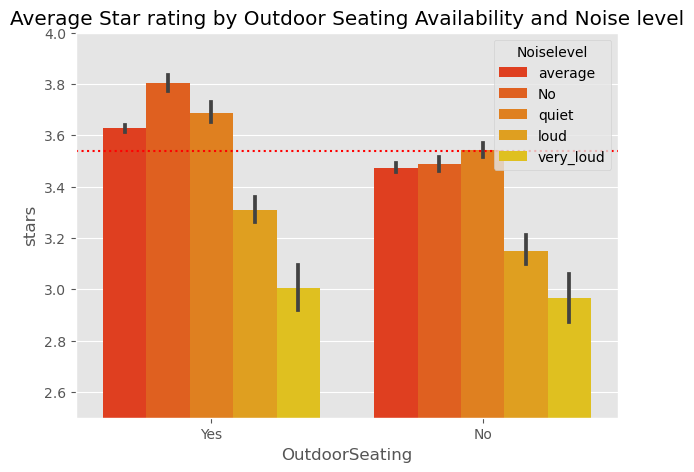

In [63]:
# df_temp = df[df['RestaurantsPriceRange']!='None']
# df['OutdoorSeating']
f, ax = plt.subplots(figsize=(7, 5))
grouped = df.groupby(['OutdoorSeating']).mean().reset_index()
ax = sns.barplot(x = 'OutdoorSeating', y = 'stars', hue = 'Noiselevel', data = df, palette = 'autumn')
ax.axhline(
    y=df['stars'].mean(), 
    color='red',
    linestyle='dotted'
)

plt.ylim([2.5, 4]);
plt.title("Average Star rating by Outdoor Seating Availability and Noise level")

**Restaurants having outdoor seating and low noise levels fetches higher average ratings than the ones not having outdoor seating. This suggests having outdoor seating is good feature to have if space permits, given the noise levels are going to stay low.**

In [38]:
cuisines = df.Cuisines.unique()
len(cuisines)

11

In [39]:
cuisines1 = cuisines[:5]
cuisines2 = cuisines[5:]
cuisines1

array(['Traditional American', 'Vietnamese', 'Italian', 'Korean',
       'Chinese'], dtype=object)

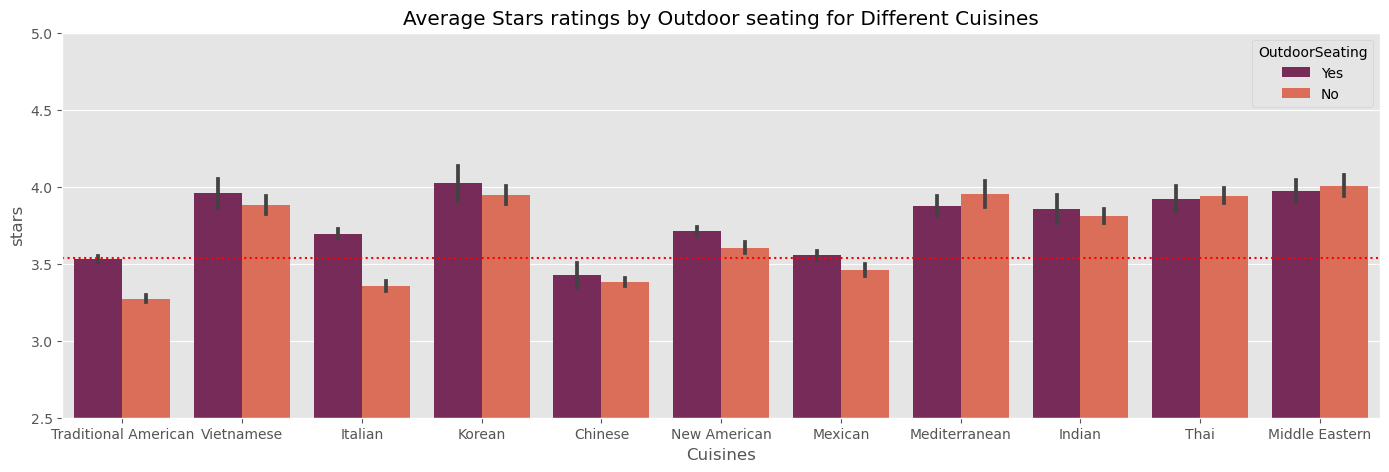

In [49]:
grouped = df[df['Cuisines'].isin(cuisines)].groupby(['Cuisines', 'OutdoorSeating']).mean().reset_index()
f, ax = plt.subplots(figsize=(17, 5))
ax = sns.barplot(x = 'Cuisines', y = 'stars', hue = 'OutdoorSeating', data = df[df['Cuisines'].isin(cuisines)], palette = 'rocket')
ax.axhline(
    y=df[df['Cuisines'].isin(cuisines)]['stars'].mean(), 
    color='red',
    linestyle='dotted'
)

plt.ylim([2.5, 5])

plt.title("Average Stars ratings by Outdoor seating for Different Cuisines")
plt.show()

**For most cuisines barring Mediterranean cuisine, having outdoor seating fetches better average ratings. For traditional american cuisines having outdoor seating makes the most difference since it fetches much better average rating.**

In [50]:
# grouped = df[df['Cuisines'].isin(cuisines2)].groupby(['Cuisines', 'OutdoorSeating']).mean().reset_index()
# f, ax = plt.subplots(figsize=(10, 5))
# ax = sns.barplot(x = 'Cuisines', y = 'stars', hue = 'OutdoorSeating', data = df[df['Cuisines'].isin(cuisines2)], palette = 'mako')
# ax.axhline(
#     y=df[df['Cuisines'].isin(cuisines2)]['stars'].mean(), 
#     color='red',
#     linestyle='dotted'
# )

# plt.ylim([2.5, 5])

# plt.title("Average Stars ratings by Outdoor seating for Different Cuisines")
# plt.show()

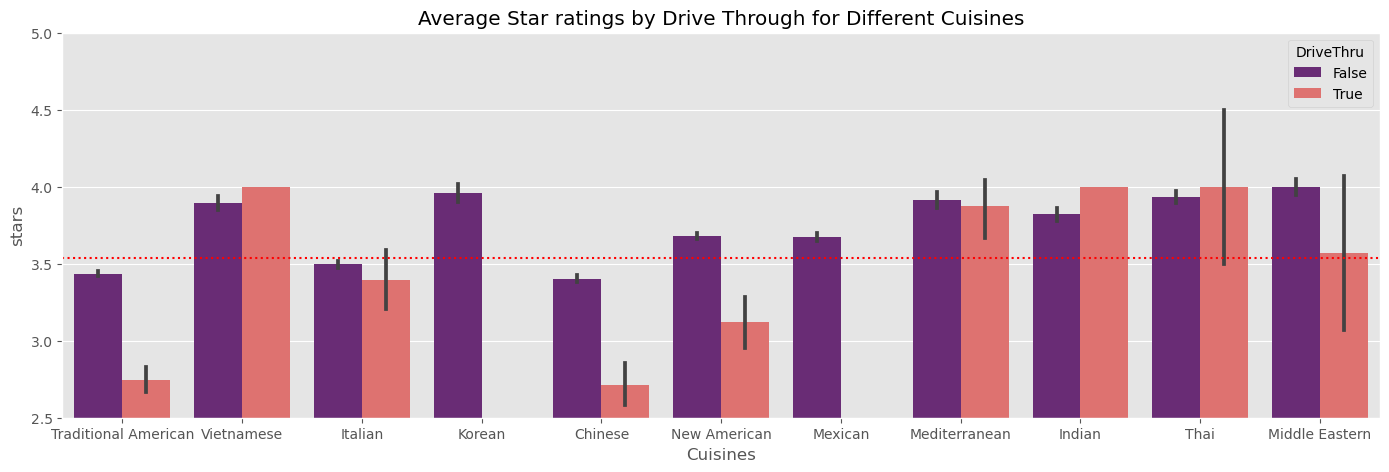

In [64]:
grouped = df[df['Cuisines'].isin(cuisines)].groupby(['Cuisines', 'DriveThru']).mean().reset_index()
f, ax = plt.subplots(figsize=(17, 5))
ax = sns.barplot(x = 'Cuisines', y = 'stars', hue = 'DriveThru', data = df[df['Cuisines'].isin(cuisines)], palette = 'magma')
ax.axhline(
    y=df[df['Cuisines'].isin(cuisines)]['stars'].mean(), 
    color='red',
    linestyle='dotted'
)

plt.ylim([2.5, 5])

plt.title("Average Star ratings by Drive Through for Different Cuisines")
plt.show()

**Drive Thru is one of the most popular feature of US restaurants. It is observed that Korean cuisine restaurants despite not having drive thru have 4.0 star average rating. The restaurants where having drive thru makes significant difference is in middle eastern, New American, Chinese and Traditional american.**

**The drop in ratings for restaurants having drive thru service can be attributed to the fast food nature of food quality served, which declines the quality of food served and decline in average ratings.**

In [65]:
# grouped = df[df['Cuisines'].isin(cuisines2)].groupby(['Cuisines', 'DriveThru']).mean().reset_index()
# f, ax = plt.subplots(figsize=(10, 5))
# ax = sns.barplot(x = 'Cuisines', y = 'stars', hue = 'DriveThru', data = df[df['Cuisines'].isin(cuisines2)], palette = 'Purples_r')
# ax.axhline(
#     y=df[df['Cuisines'].isin(cuisines2)]['stars'].mean(), 
#     color='red',
#     linestyle='dotted'
# )

# plt.ylim([2.5, 5])

# plt.title("Average Star ratings by Drive Through for Different Cuisines")
# plt.show()

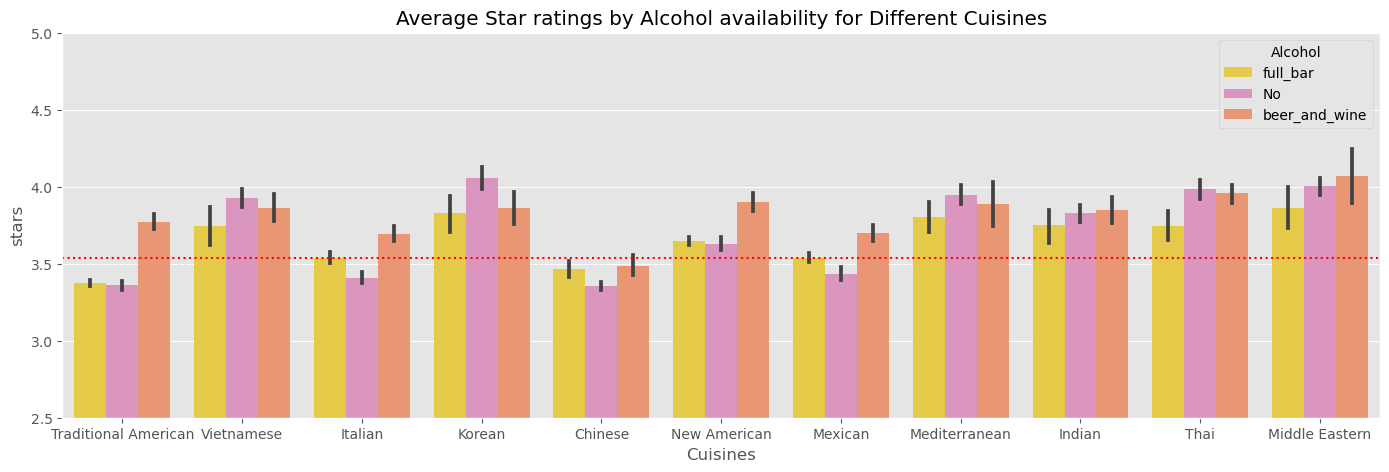

In [66]:
grouped = df[df['Cuisines'].isin(cuisines)].groupby(['Cuisines', 'Alcohol']).mean().reset_index()
f, ax = plt.subplots(figsize=(17, 5))
ax = sns.barplot(x = 'Cuisines', y = 'stars', hue = 'Alcohol', data = df[df['Cuisines'].isin(cuisines)], palette = 'Set2_r')
ax.axhline(
    y=df[df['Cuisines'].isin(cuisines)]['stars'].mean(), 
    color='red',
    linestyle='dotted'
)

plt.ylim([2.5, 5])

plt.title("Average Star ratings by Alcohol availability for Different Cuisines")
plt.show()

**Overall restaurants having beer and wine fetches highest average ratings. Traditional american restaurants serving beer and wine are much higher rated than full bars and no alcohol serving restaurants, whereas availability of alcohol doesn't seem to affect the average ratings in other cuisine restaurants.**

In [67]:
# grouped = df[df['Cuisines'].isin(cuisines2)].groupby(['Cuisines', 'Alcohol']).mean().reset_index()
# f, ax = plt.subplots(figsize=(10, 5))
# ax = sns.barplot(x = 'Cuisines', y = 'stars', hue = 'Alcohol', data = df[df['Cuisines'].isin(cuisines2)], palette = 'twilight_r')
# ax.axhline(
#     y=df[df['Cuisines'].isin(cuisines2)]['stars'].mean(), 
#     color='red',
#     linestyle='dotted'
# )

# plt.ylim([2.5, 5])

# plt.title("Average Star ratings by Alcohol service for Different Cuisines")
# plt.show()

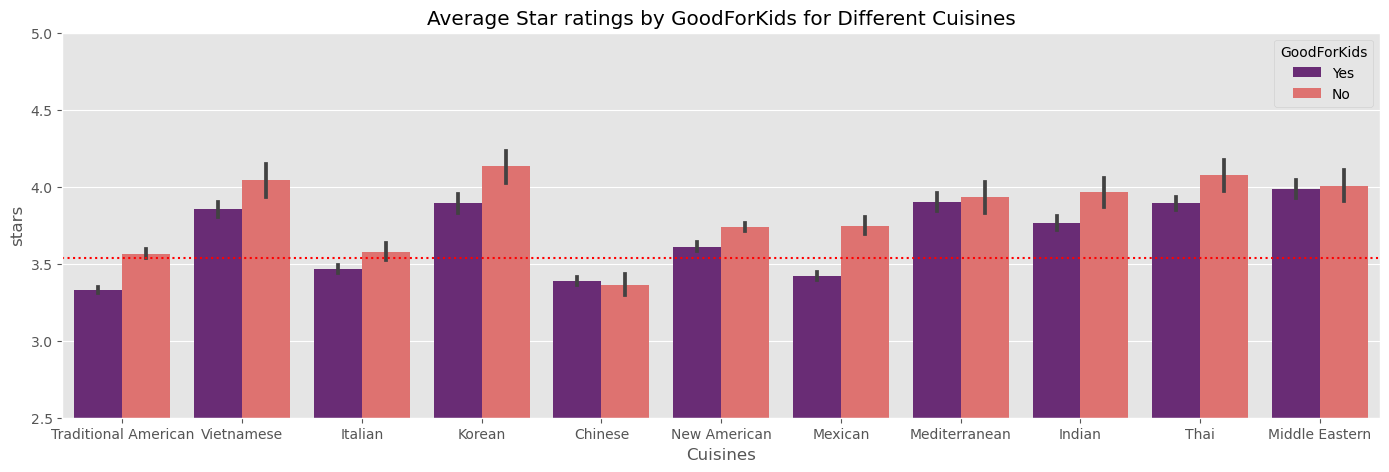

In [68]:
grouped = df[df['Cuisines'].isin(cuisines)].groupby(['Cuisines', 'GoodForKids']).mean().reset_index()
f, ax = plt.subplots(figsize=(17, 5))
ax = sns.barplot(x = 'Cuisines', y = 'stars', hue = 'GoodForKids', data = df[df['Cuisines'].isin(cuisines)], palette = 'magma')
ax.axhline(
    y=df[df['Cuisines'].isin(cuisines)]['stars'].mean(), 
    color='red',
    linestyle='dotted'
)

plt.ylim([2.5, 5])

plt.title("Average Star ratings by GoodForKids for Different Cuisines")
plt.show()

**The restaurants which are rated good for kids have lower average rating, we have two theories as to why**
- 1. Having young children in restaurants can lead to cause more noise, which can put off other customers.
- 2. Parents of children might have higher expectations for kid-friendliness, failing which these customers give lower ratings.

In [84]:
grouped = df[df['Cuisines'].isin(cuisines)].groupby(['Noiselevel','GoodForKids']).count().reset_index()
grouped['business_id']

0     4197
1     2720
2     2679
3    11829
4      512
5      883
6      545
7     3505
8      185
9      275
Name: business_id, dtype: int64

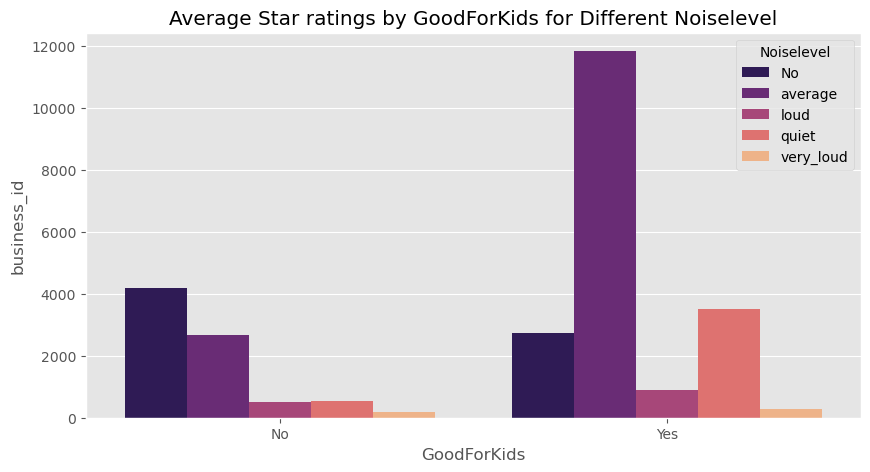

In [85]:
# grouped = df[df['Cuisines'].isin(cuisines)].groupby(['Cuisines', 'GoodForKids']).mean().reset_index()
f, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x = 'GoodForKids', y = 'business_id', hue = 'Noiselevel', data = grouped, palette = 'magma')
# ax.axhline(
#     y=grouped, 
#     color='red',
#     linestyle='dotted'
# )

# plt.ylim([2.5, 5])

plt.title("Average Star ratings by GoodForKids for Different Noiselevel")
plt.show()

**This plot somewhat supports our theory 1. that a restaurant being good for kids has higher noise levels than usual.**

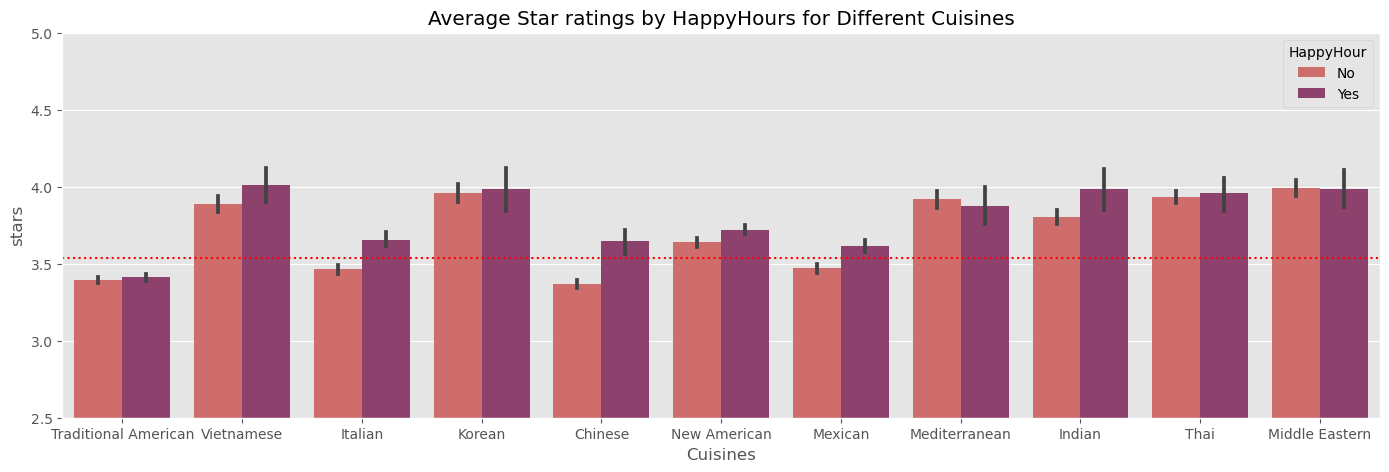

In [86]:
grouped = df[df['Cuisines'].isin(cuisines)].groupby(['Cuisines', 'HappyHour']).mean().reset_index()
f, ax = plt.subplots(figsize=(17, 5))
ax = sns.barplot(x = 'Cuisines', y = 'stars', hue = 'HappyHour', data = df[df['Cuisines'].isin(cuisines)], palette = 'flare')
ax.axhline(
    y=df[df['Cuisines'].isin(cuisines)]['stars'].mean(), 
    color='red',
    linestyle='dotted'
)

plt.ylim([2.5, 5])

plt.title("Average Star ratings by HappyHours for Different Cuisines")
plt.show()

**Very small difference in average ratings is seen in average ratings for restaurant cuisine having happy hours and those not having it. This suggests keeping happy hours in restaurants does not necessarily fetches better ratings from customers.**

In [87]:
# grouped = df[df['Cuisines'].isin(cuisines2)].groupby(['Cuisines', 'HappyHour']).mean().reset_index()
# f, ax = plt.subplots(figsize=(10, 5))
# ax = sns.barplot(x = 'Cuisines', y = 'stars', hue = 'HappyHour', data = df[df['Cuisines'].isin(cuisines2)], palette = 'flare')
# ax.axhline(
#     y=df[df['Cuisines'].isin(cuisines2)]['stars'].mean(), 
#     color='red',
#     linestyle='dotted'
# )

# plt.ylim([2.5, 5])

# plt.title("Average Star ratings by HappyHours for Different Cuisines")
# plt.show()